# **PRÁCTICA 4:  Machine Learning - Parte 1: SVR para la regresión**
### Universitat de València, Escola Tecnica Superior d'Enginyeria
### Elena Marrero Castellano | 3ª curso del Grado Ciencia de Datos

En esta práctica veremos como se utiliza la versión para regresión de la SVM, la SVR. Entenderemos en un ejemplo juguete que efecto tiene cada hiperparámetro. 

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV

## Usaremos un ejemplo "juguete".

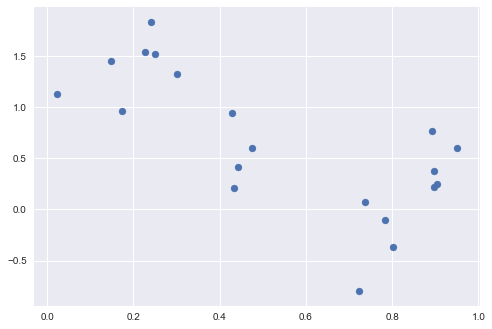

In [ ]:
# Gegneramos los datos siguiendo una onda senoidal y les añadimos ruido
N = 20 #núúmero de datos
X = np.random.rand(N,1)

y = np.sin(7*X[:,0] ) + 1.0 * np.random.rand(N,)

# Representamos los datos
plt.style.use('seaborn')
plt.scatter(X, y)

# Dividimos ya desde el principio nuestros datos en entrenamiento y test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=1/3)

# Generamos unas muestras que cubren todo el dominio
xx = np.expand_dims(np.linspace(np.min(X), np.max(X), 30), axis=1)

## Vamos a aplicar la SVR sobre los datos generados
Vamos a utilizar unos parámetros puestos a mano y vamos a ver cual es la prediccióón que hace sobre los datos de train. 

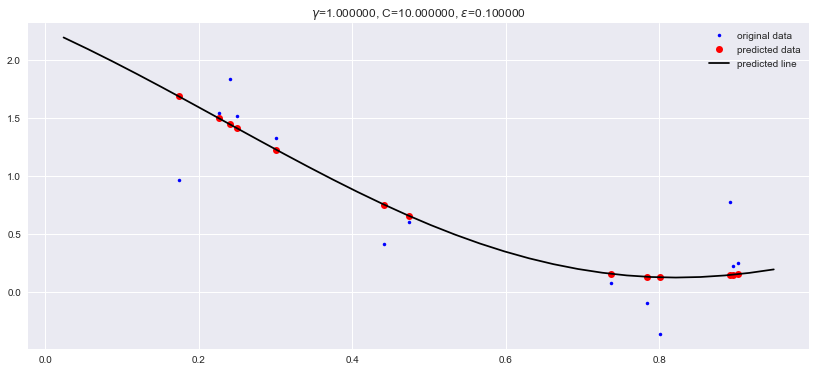

In [ ]:
plt.figure(figsize=(14,6))
C = 10 # error?¿?¿ con C pequeño penalizo poco los errores, C grande penalizo más
epsilon = 0.1 #anchura a partir de la cual nosotros mepezamos a penalizar los errores. Si la anchura a partir de la cual yo considero que tengo qu epenalizar el error o no.
gamma = 1.0 #gamma truquito ajustarla a la media de las distancias

svr = SVR(kernel='rbf', gamma=gamma, C=C, epsilon=epsilon)
svr.fit(Xtrain, ytrain)

y_hat = svr.predict(Xtrain)
yy = svr.predict(xx)

plt.plot(Xtrain, ytrain, 'b.', label="original data")
plt.plot(Xtrain, y_hat, 'ro', label="predicted data")
plt.plot(xx, yy, 'k', label="predicted line")

plt.title('$\gamma$=%f' % gamma + ', C=%f' % C + ', $\epsilon$=%f' % epsilon)

plt.legend(); plt.grid(1)

# Ejercicio 1
Analiza es el efecto del parámetro C. Muestra cúal es el resultado para distintos valore de C en los datos de entrenamiento y en los datos de test.
Explica con tus palabras el efecto que produce en las predicciones. 

In [ ]:
def vario_C(X,y):
    plt.figure(figsize=(14,6))
    #fig, ax = plt.subplots(4, 3, figsize=(14,6))
    C_v=np.logspace(-3,3,10)
    for n, C in enumerate(C_v):

        epsilon = 0.1
        gamma = 1.0 

        svr = SVR(kernel='rbf', gamma=gamma, C=C, epsilon=epsilon)
        svr.fit(X, y)

        y_hat = svr.predict(X)
        yy = svr.predict(xx)

        ax= plt.subplot(4, 3, n+1)
        plt.plot(X, y, 'b.')
        plt.plot(X, y_hat, 'ro')
        plt.plot(xx, yy, 'k')

        plt.title('$\gamma$=%f' % gamma + ', C=%f' % C + ', $\epsilon$=%f' % epsilon)

        plt.grid(1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)

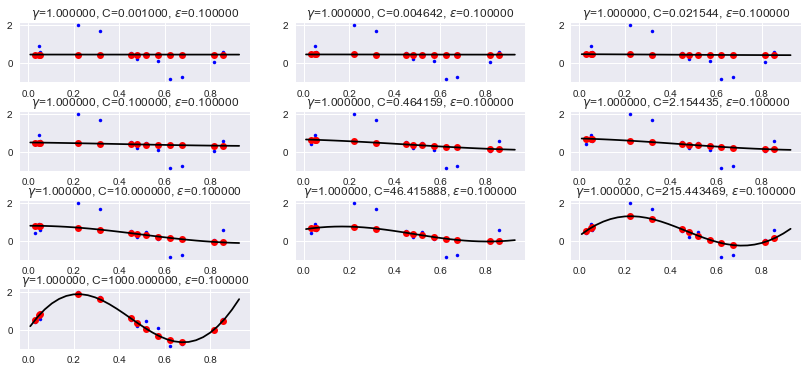

In [ ]:
# Variacion de C Train
vario_C(Xtrain,ytrain)

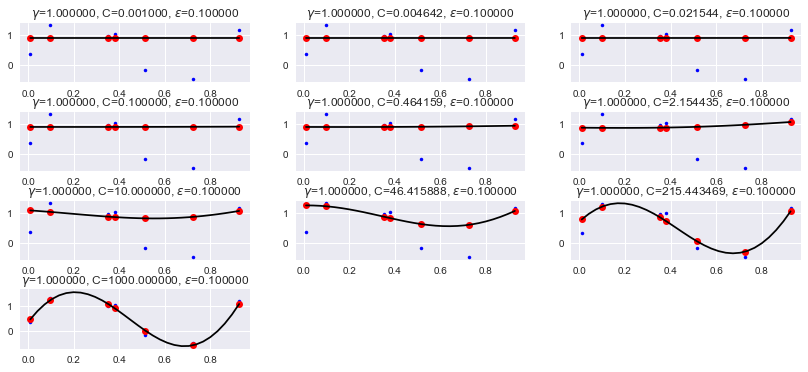

In [ ]:
# Variacion de C Test
vario_C(Xtest,ytest)

# Ejercicio 2
Analiza es el efecto del parámetro $\gamma$. Muestra cúal es el resultado para distintos valore de $\gamma$ en los datos de entrenamiento y en los datos de test. Explica con tus palabras el efecto que produce en las predicciones. 

In [ ]:
def vario_gamma(X,y):
    plt.figure(figsize=(14,6))
    #fig, ax = plt.subplots(4, 3, figsize=(14,6))
    gamma_v=np.logspace(-3,3,10)
    for n, gamma in enumerate(gamma_v):

        epsilon = 0.1
        C = 10

        svr = SVR(kernel='rbf', gamma=gamma, C=C, epsilon=epsilon)
        svr.fit(X, y)

        y_hat = svr.predict(X)
        yy = svr.predict(xx)

        ax= plt.subplot(4, 3, n+1)
        plt.plot(X, y, 'b.')
        plt.plot(X, y_hat, 'ro')
        plt.plot(xx, yy, 'k')

        plt.title('$\gamma$=%f' % gamma + ', C=%f' % C + ', $\epsilon$=%f' % epsilon)

        plt.grid(1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)

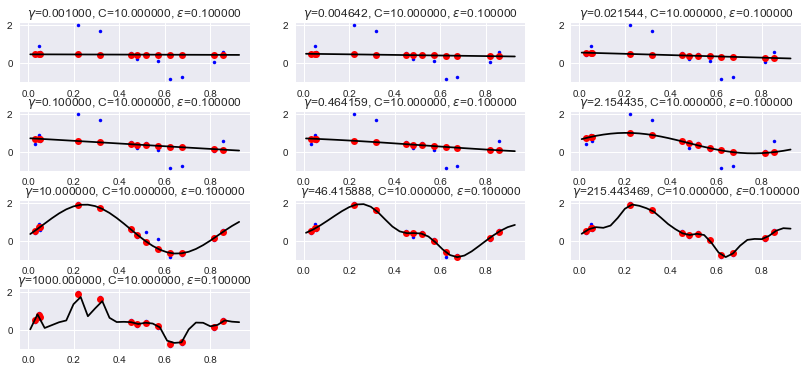

In [ ]:
# Variacion de Gamma Train
vario_gamma(Xtrain,ytrain)

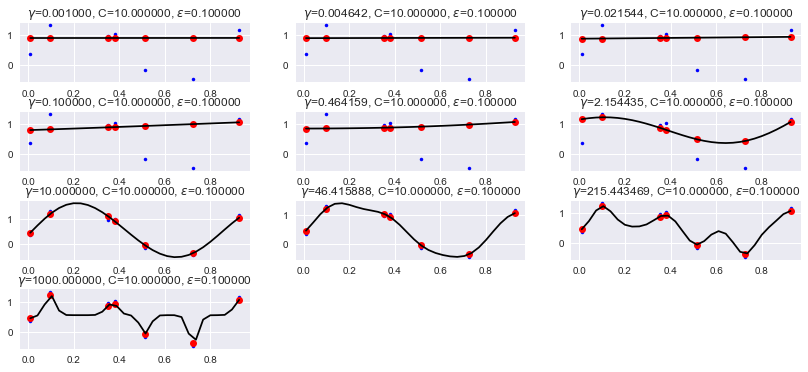

In [ ]:
# Variacion de Gamma Test
vario_gamma(Xtest,ytest)

# Ejercicio 3
Repite para el comportamiento de $\varepsilon$.

Opcional: en lugar de copiar y pegar el código crea una función donde se le pase el conjunto de train o test como argumento y haga la representación.

In [ ]:
#Creamos una función que le pases los parámetros de Xtrain e ytrain ó Xtest e ytest, y nos haga la representación:
#La llamaremos vario_epsilon:
def vario_epsilon(Xt,yt): #Xt: Xtrain o Xtest, yt: ytrain o ytest
    plt.figure(figsize=(14,6))
    epsilon_v=np.logspace(-2,2,10)
    for n, epsilon in enumerate(epsilon_v):

        gamma=10.00
        C = 10

        svr = SVR(kernel='rbf', gamma=gamma, C=C, epsilon=epsilon)
        svr.fit(Xt, yt)

        y_hat = svr.predict(Xt)
        yy = svr.predict(xx)

        ax= plt.subplot(4, 3, n+1)
        plt.plot(Xt, yt, 'b.')
        plt.plot(Xt, y_hat, 'ro')
        plt.plot(xx, yy, 'k')

        plt.title('$\gamma$=%f' % gamma + ', C=%f' % C + ', $\epsilon$=%f' % epsilon)

        plt.grid(1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)

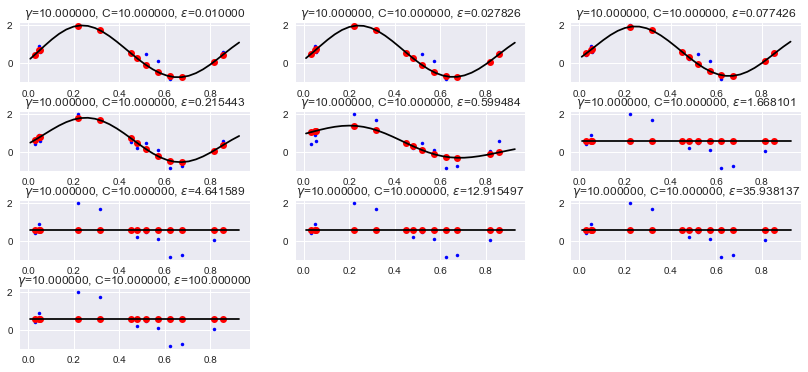

In [ ]:
# Variacion de epsilon Train
vario_epsilon(Xtrain,ytrain)

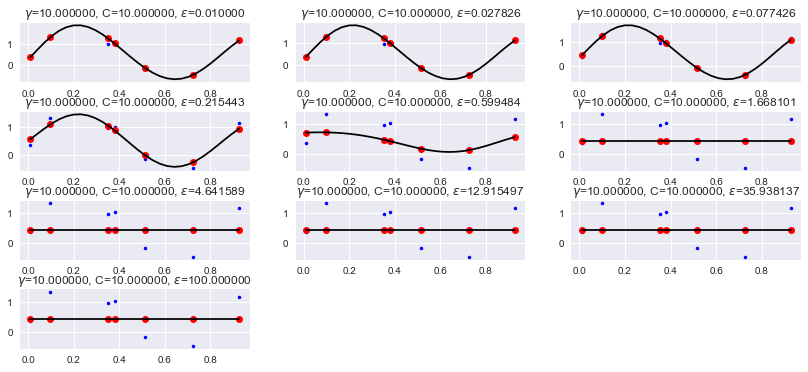

In [ ]:
# Variacion de epsilon Test
vario_epsilon(Xtest,ytest)

# Ejercicio 4
Realiza todo el proceso anterior con el siguiente dataset. ¿Las conclusiones que has sacado sobre el efecto de los paráámetros son consistentes?

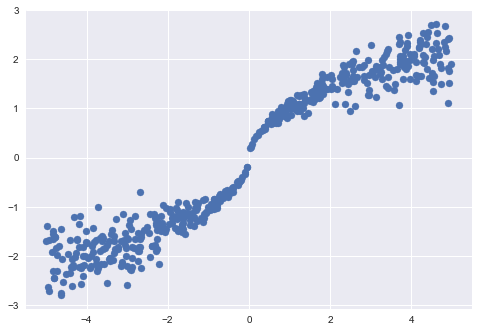

In [ ]:
# Gegneramos los datos 
N = 500
X = (np.random.rand(N,1)-0.5)*10

y = (np.sign(X[:,0])*np.abs(X[:,0])**0.5) + 0.1 * np.random.randn(N,)*X[:,0]

# Representamos los datos
plt.scatter(X, y)

# Dividimos ya desde el principio nuestros datos en entrenamiento y test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=1/3)

ytest = ytest + 0.5
# Generamos unas muestras que cubren todo el dominio
xx = np.expand_dims(np.linspace(np.min(X),np.max(X),30),axis=1)

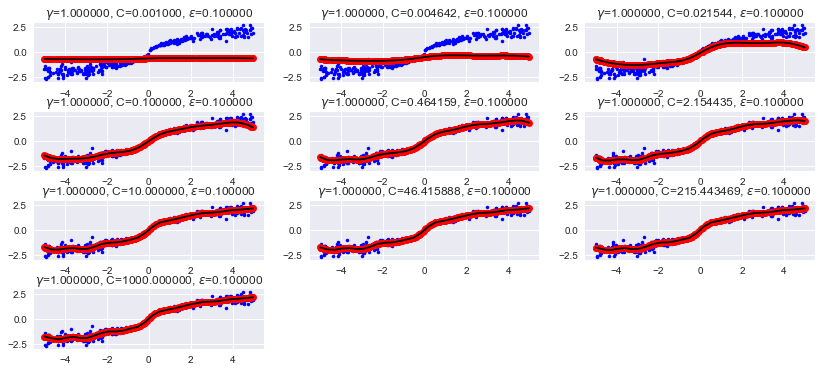

In [ ]:
vario_C(Xtrain,ytrain)

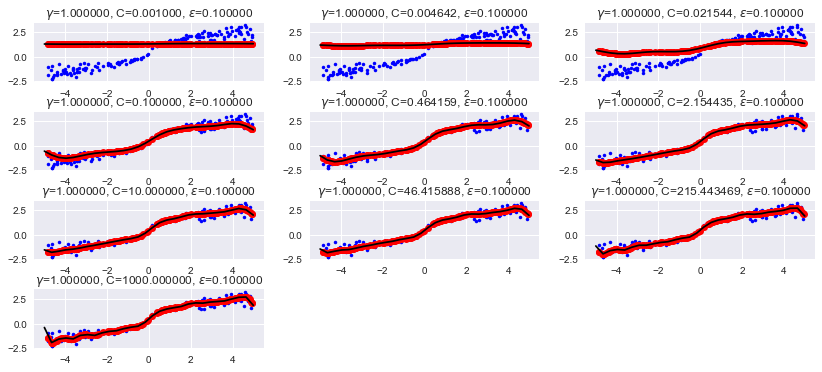

In [ ]:
vario_C(Xtest,ytest)

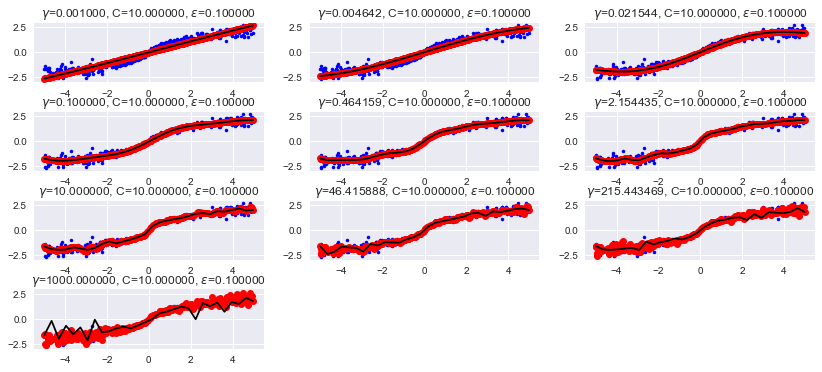

In [ ]:
vario_gamma(Xtrain,ytrain)

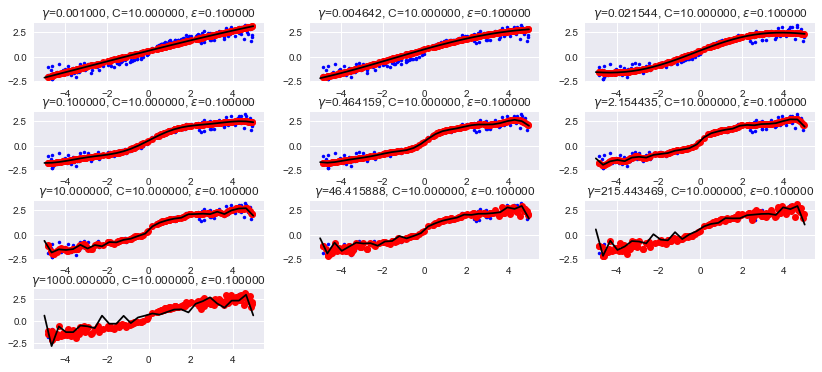

In [ ]:
vario_gamma(Xtest,ytest)

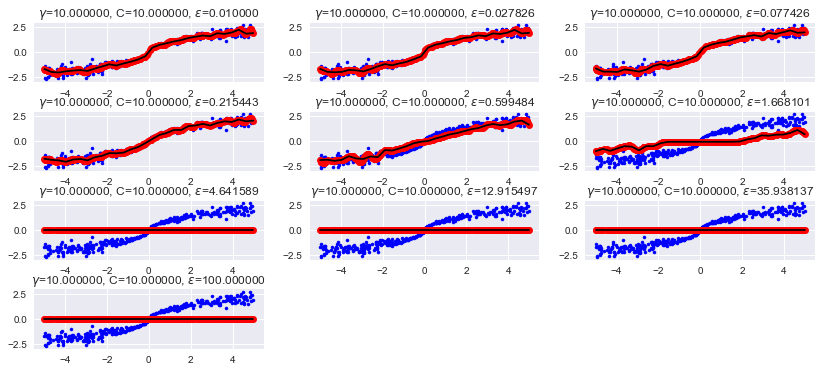

In [ ]:
vario_epsilon(Xtrain,ytrain)

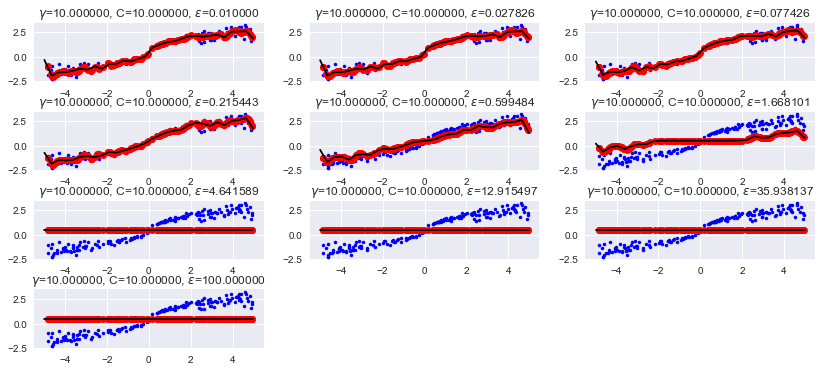

In [ ]:
vario_epsilon(Xtest,ytest)